# Sujet : Personnalisation des recommandations des produits dans le cadre d’un site E-commerce

**Réaliser par :**
   *Achraf Akrache* et 
   *Asmae Moubarriz*
- Variable décisionnelle : catégories de produits 
 
- Lien de téléchargement du jeu de données https://www.kaggle.com/datasets/kartikeybartwal/ecommerce-product-recommendation-collaborative 

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
#approche1
from sklearn.neighbors import KNeighborsClassifier
#approche2
from sklearn.linear_model import LogisticRegression
#approche3
from sklearn.tree import DecisionTreeClassifier
#approche4
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# **Phase d'exploration**

## chargement des donénes depuis le fichier CSV

In [51]:
data = pd.read_csv('user_personalized_features.csv')

- notre dataset est composée de 15 columns dont 9 colomns avec des valeurs numérique .
- notre dataset est de taille 1000 record

In [52]:
data.describe()

,Unnamed: 0,Age,Income,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Time_Spent_on_Site_Minutes,Pages_Viewed
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,40.986000,81304.732000,15.586000,4.631000,104.039000,2552.957000,297.360000,24.40300
std,288.819436,13.497852,37363.972753,8.205604,2.837762,54.873569,1420.985048,175.596123,14.02017
min,0.000000,18.000000,20155.000000,1.000000,0.000000,10.000000,112.000000,2.000000,1.00000
25%,249.750000,29.000000,48715.500000,8.000000,2.000000,58.000000,1271.750000,144.000000,12.00000
50%,499.500000,42.000000,81042.000000,16.000000,5.000000,105.000000,2542.000000,292.500000,24.50000
75%,749.250000,52.000000,112694.500000,23.000000,7.000000,150.000000,3835.500000,449.250000,36.00000
max,999.000000,64.000000,149951.000000,29.000000,9.000000,199.000000,4999.000000,599.000000,49.00000


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   1000 non-null   int64 
 1   User_ID                      1000 non-null   object
 2   Age                          1000 non-null   int64 
 3   Gender                       1000 non-null   object
 4   Location                     1000 non-null   object
 5   Income                       1000 non-null   int64 
 6   Interests                    1000 non-null   object
 7   Last_Login_Days_Ago          1000 non-null   int64 
 8   Purchase_Frequency           1000 non-null   int64 
 9   Average_Order_Value          1000 non-null   int64 
 10  Total_Spending               1000 non-null   int64 
 11  Product_Category_Preference  1000 non-null   object
 12  Time_Spent_on_Site_Minutes   1000 non-null   int64 
 13  Pages_Viewed                 1000 

## Visualisation des relations entre la variable décisionelle et les autres colonnes

### Définition des Variables importants
 (***cette étape génére des variables qui vont être utilisé dans des autres noeuds***)

In [54]:
categorical_columns = ['Gender', 'Location', 'Interests']
numerical_columns = ['Age', 'Income', 'Last_Login_Days_Ago', 'Purchase_Frequency', 'Average_Order_Value', 
                     'Total_Spending', 'Time_Spent_on_Site_Minutes', 'Pages_Viewed']

target = 'Product_Category_Preference'

### Plot pour les colonnes de type Objet 

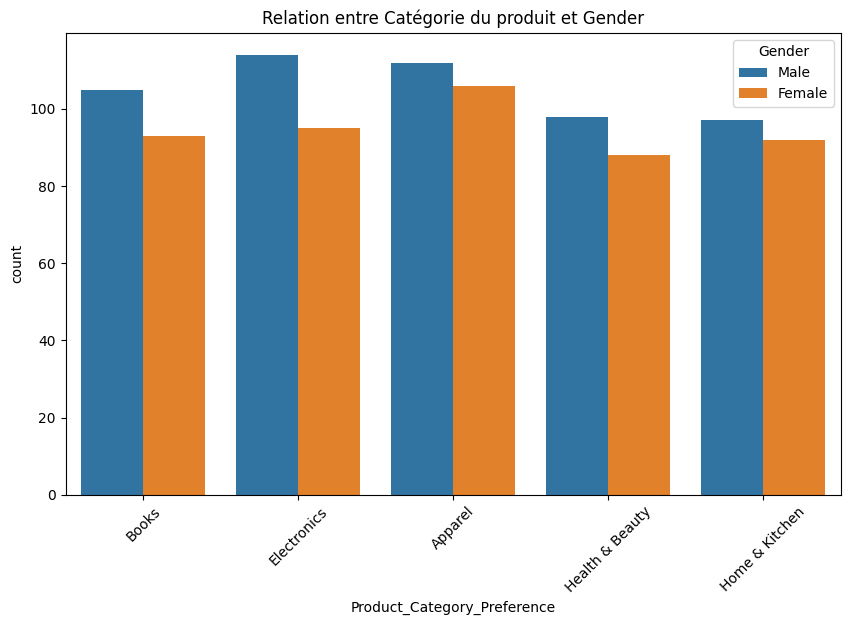

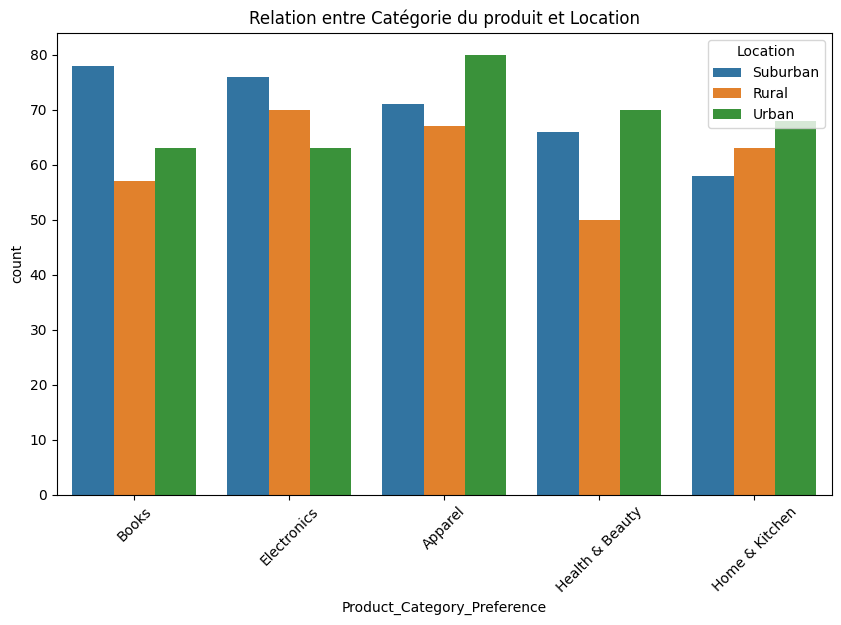

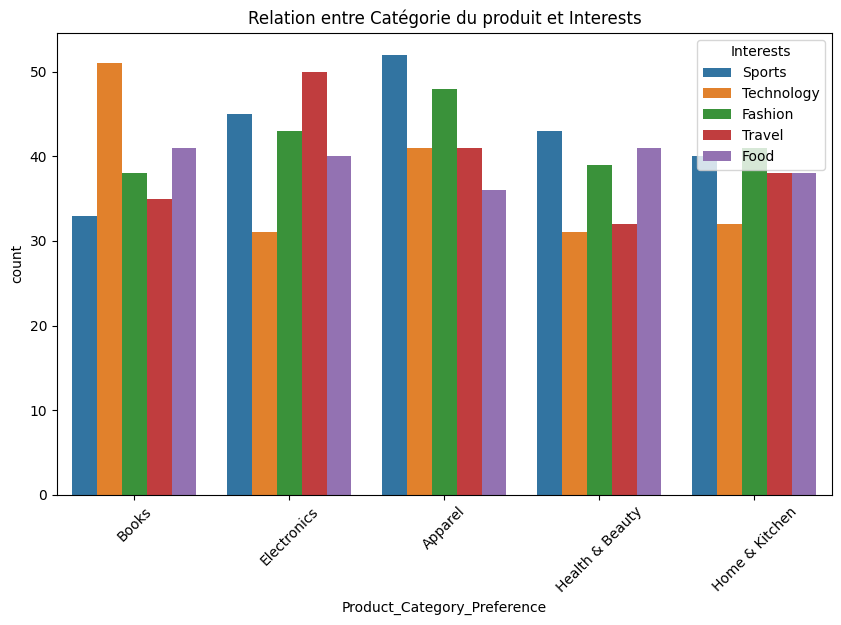

In [55]:
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=target, hue=col)
    plt.title(f'Relation entre Catégorie du produit et {col}')
    plt.xticks(rotation=45)
    plt.show()

### Calcule de la corrélation des variables numériques avec la variable décisionelle 

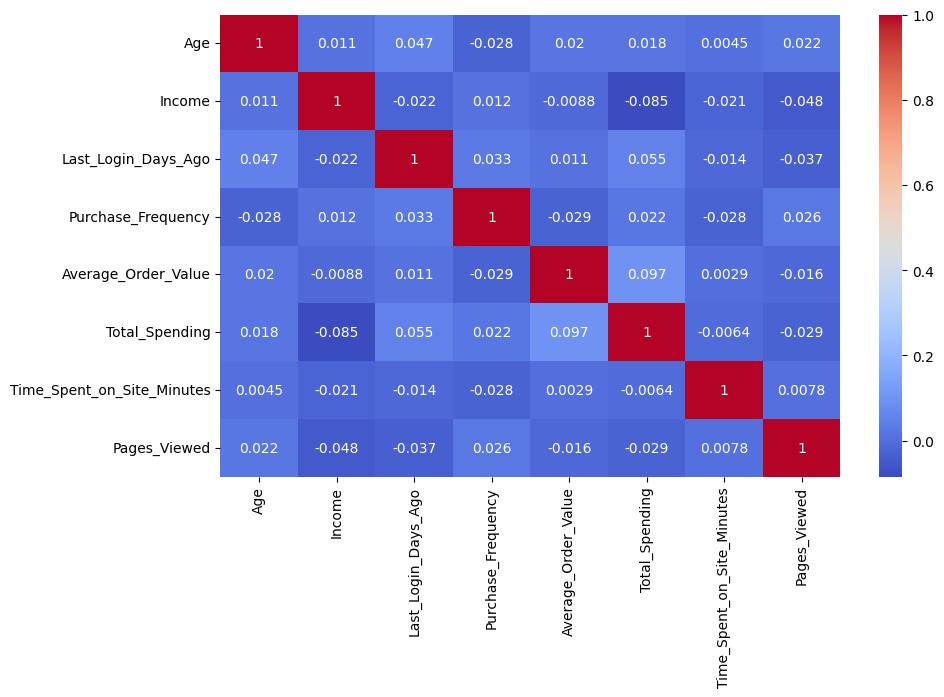

In [56]:
correlation_matrice = data[numerical_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrice, annot=True, cmap='coolwarm')
plt.show()

<span style="color: red;"> Remarque : </span>
on remarque que les variables sont  **faiblement** corréler entre eux donc on n'a pas besoin de supprimer aucune colonne

# **Phase de pré-traitement des données**

- calcule de l'asymétrie(skewness) de chaque column numérique
- calcule du inner bound et outer bound
- rendre les valeurs abérantes null

## Vérification des variables aberrantes  

***on remarque la valeur du skewness est presque null dans tous les colonnees ce qui montre l'abscence des valeurs abérantes***

In [57]:
for column in numerical_columns:
    skewness_per_column = data[column].skew()
    print(f"Skewness for {column} is {skewness_per_column}")

Skewness for Age is -0.046883220802412674
Skewness for Income is 0.0985078994287348
Skewness for Last_Login_Days_Ago is -0.0667529892316686
Skewness for Purchase_Frequency is -0.03551313447193858
Skewness for Average_Order_Value is 0.0314231961140403
Skewness for Total_Spending is 0.003128740092689204
Skewness for Time_Spent_on_Site_Minutes is 0.02435168716510395
Skewness for Pages_Viewed is 0.037588211407260146


## Vérification de l'existance des nulls et duplicats 

In [58]:
print("Vérification des nulls")
print(data.isnull().sum())
data.dropna(inplace=True)

Vérification des nulls
Unnamed: 0                     0
User_ID                        0
Age                            0
Gender                         0
Location                       0
Income                         0
Interests                      0
Last_Login_Days_Ago            0
Purchase_Frequency             0
Average_Order_Value            0
Total_Spending                 0
Product_Category_Preference    0
Time_Spent_on_Site_Minutes     0
Pages_Viewed                   0
Newsletter_Subscription        0
dtype: int64


In [59]:
print("Vérification des duplications")
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)

Vérification des duplications
0


## Suppression des colonnes inutiles 

In [60]:
data.drop(['Unnamed: 0' ,'User_ID','Last_Login_Days_Ago','Time_Spent_on_Site_Minutes','Pages_Viewed','Newsletter_Subscription','Average_Order_Value','Purchase_Frequency'], axis=1, inplace=True)

**generation d'un nouveau fichier csv avec les données traitées et chargement des nouvelles données**

In [61]:
data.to_csv('user_personalized_features_cleaned.csv', index=False)
data.empty
data = pd.read_csv('user_personalized_features_cleaned.csv')

# **Phase d'Entrainement**

## <span style="color: Cyan;">Premier Essai </span>
- Type d'encodage :  **( Label Encodage )**
- Model essayé : Logistic Regression , Kneighbors  , DecisionTree

**<span style="color: Red;">Résultat :</span>** accuracy ne dépace pas **20%**

### Visualisation des données aprés pré-traitement

In [62]:
data.head()

,Age,Gender,Location,Income,Interests,Total_Spending,Product_Category_Preference
0,56,Male,Suburban,38037,Sports,2546,Books
1,46,Female,Rural,103986,Technology,320,Electronics
2,32,Female,Suburban,101942,Sports,3766,Apparel
3,60,Female,Suburban,71612,Fashion,4377,Apparel
4,25,Male,Suburban,49725,Travel,4502,Health & Beauty


### Encodage des variables avec *Label Encoding*

In [63]:
data_label_encoded = data.copy()

In [64]:
Genderencodage = LabelEncoder()
data_label_encoded['Gender']=Genderencodage.fit_transform(data_label_encoded['Gender'])
Locationencodage = LabelEncoder()
data_label_encoded['Location']=Locationencodage.fit_transform(data_label_encoded['Location'])
Interestsencodage = LabelEncoder()
data_label_encoded['Interests']=Interestsencodage.fit_transform(data_label_encoded['Interests'])
data_label_encoded.head()

,Age,Gender,Location,Income,Interests,Total_Spending,Product_Category_Preference
0,56,1,1,38037,2,2546,Books
1,46,0,0,103986,3,320,Electronics
2,32,0,1,101942,2,3766,Apparel
3,60,0,1,71612,0,4377,Apparel
4,25,1,1,49725,4,4502,Health & Beauty


### Split des valeurs test et entrainement 

- on definie le X , qui est le dataset sans la variable decisionnelle (Product_category_preference)

- on definie le y qui est la colonne de la variable décisionnelle (Product_category_preference)

In [65]:
X= data.drop(columns=['Product_Category_Preference'])  # Variables prédictives
y = data['Product_Category_Preference'] 

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## <span style="color: Cyan;">2éme Essai </span>
- Type d'encodage :  **( One-Hot Encoding )**
- Model essayé : Logistic Regression , Kneighbors  , DecisionTree

**<span style="color: Red;">Résultat :</span>** accuracy ne dépace pas **20%**

## Prémiére Approche (Logistic Regression)

In [67]:
Category_encoder = LabelEncoder()
data['Product_Category_Preference']=Category_encoder.fit_transform(data['Product_Category_Preference'])
data.head()

,Age,Gender,Location,Income,Interests,Total_Spending,Product_Category_Preference
0,56,Male,Suburban,38037,Sports,2546,1
1,46,Female,Rural,103986,Technology,320,2
2,32,Female,Suburban,101942,Sports,3766,0
3,60,Female,Suburban,71612,Fashion,4377,0
4,25,Male,Suburban,49725,Travel,4502,3


In [68]:
X = data.drop(columns=['Product_Category_Preference_Home & Kitchen' ,
                       'Product_Category_Preference_Health & Beauty',
                       'Product_Category_Preference_Books',
                       'Product_Category_Preference_Electronics'])  # Variables prédictives
y = data[['Product_Category_Preference_Home & Kitchen' ,
                       'Product_Category_Preference_Health & Beauty',
                       'Product_Category_Preference_Books',
                       'Product_Category_Preference_Electronics']].idxmax(axis=1)  # Variable cible


KeyError: "['Product_Category_Preference_Home & Kitchen', 'Product_Category_Preference_Health & Beauty', 'Product_Category_Preference_Books', 'Product_Category_Preference_Electronics'] not found in axis"